In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('NaturalFiresTOPOGRAPHY_mean_elev.csv')

print(df["scientificNames"])

print(df.columns)

print(df["hourly.time"])

0       Quercus suber L.; ; Magnoliopsida; Eucalyptus ...
1       Eucalyptus L'Hér.; Pinus pinea L.; Magnoliopsi...
2       Magnoliopsida; Tracheophyta; Pinales; Pinus pi...
3       Magnoliopsida; Pinales; Pinus pinaster Aiton; ...
4       Pinus pinaster Aiton; Tracheophyta; Magnoliops...
                              ...                        
1765    Magnoliopsida; Pinus pinaster Aiton; Tracheoph...
1766    Magnoliopsida; Pinus pinaster Aiton; Eucalyptu...
1767    Magnoliopsida; Olea europaea L.; Pinus pinaste...
1768    Pinus pinaster Aiton; Eucalyptus L'Hér.; Olea ...
1769    Pinus pinaster Aiton; Eucalyptus L'Hér.; Magno...
Name: scientificNames, Length: 1770, dtype: object
Index(['year', 'date', 'district', 'municipality', 'parish', 'local',
       'latitude', 'longitude', 'cause', 'elevation', 'hourly.time',
       'hourly.temperature_2m', 'hourly.relative_humidity_2m',
       'hourly.dew_point_2m', 'hourly.apparent_temperature',
       'hourly.precipitation', 'hourly.rain', 'h

0            Quercus suber L.
0                            
0               Magnoliopsida
0           Eucalyptus L'Hér.
1           Eucalyptus L'Hér.
                ...          
1769             Tracheophyta
1769               Quercus L.
1769    Castanea sativa Mill.
1769             Acacia Mill.
1769                         
Name: scientificNames, Length: 8711, dtype: object


/tmp/ipykernel_11702/699625083.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='species', y='count', data=species_counts, palette=palette)


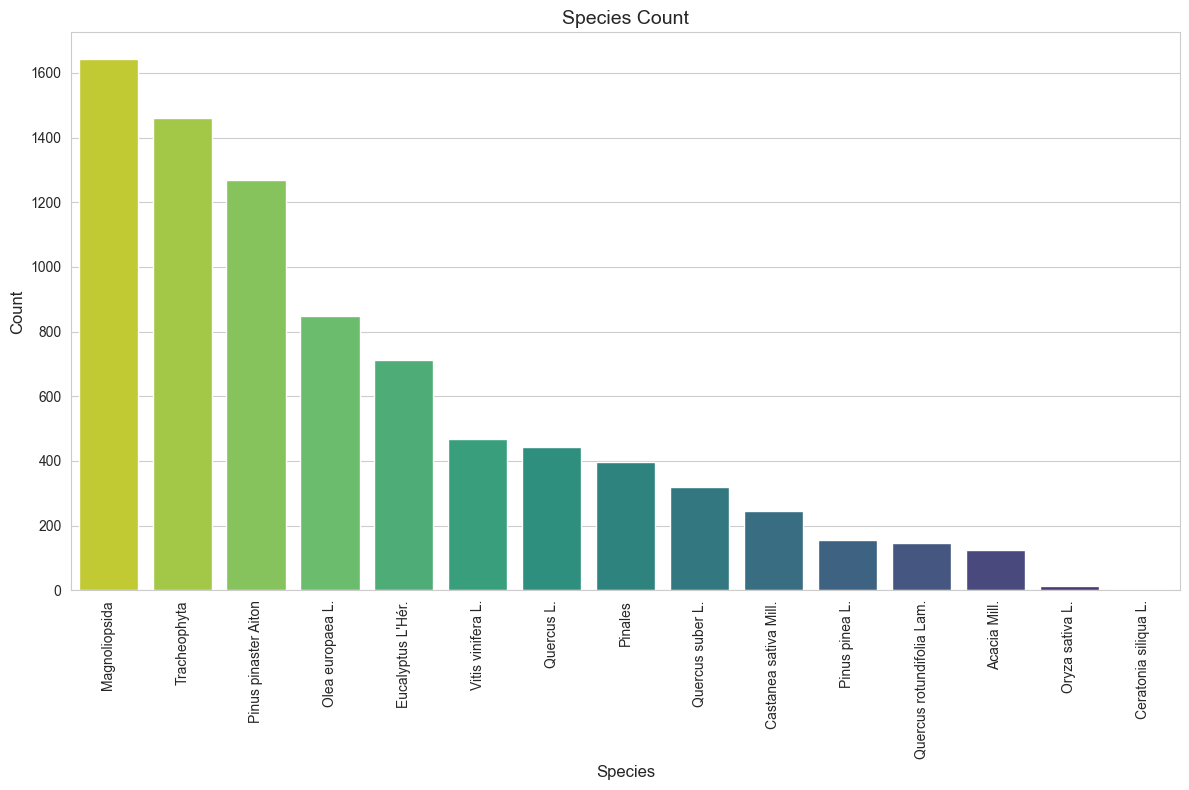

In [20]:
species = df['scientificNames'].str.split(';').apply(lambda x: [i.strip() for i in x]).explode()
print(species)

species = species[species != '']

species_counts = species.value_counts().reset_index()


species_counts.columns = ['species', 'count']


sns.set_style("whitegrid")


num_species = species_counts.shape[0]
palette = sns.color_palette("viridis", num_species)


palette.reverse()


plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='species', y='count', data=species_counts, palette=palette)


plt.title('Species Count', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

plt.savefig('simpleStatistics/species_count.png')

plt.show()

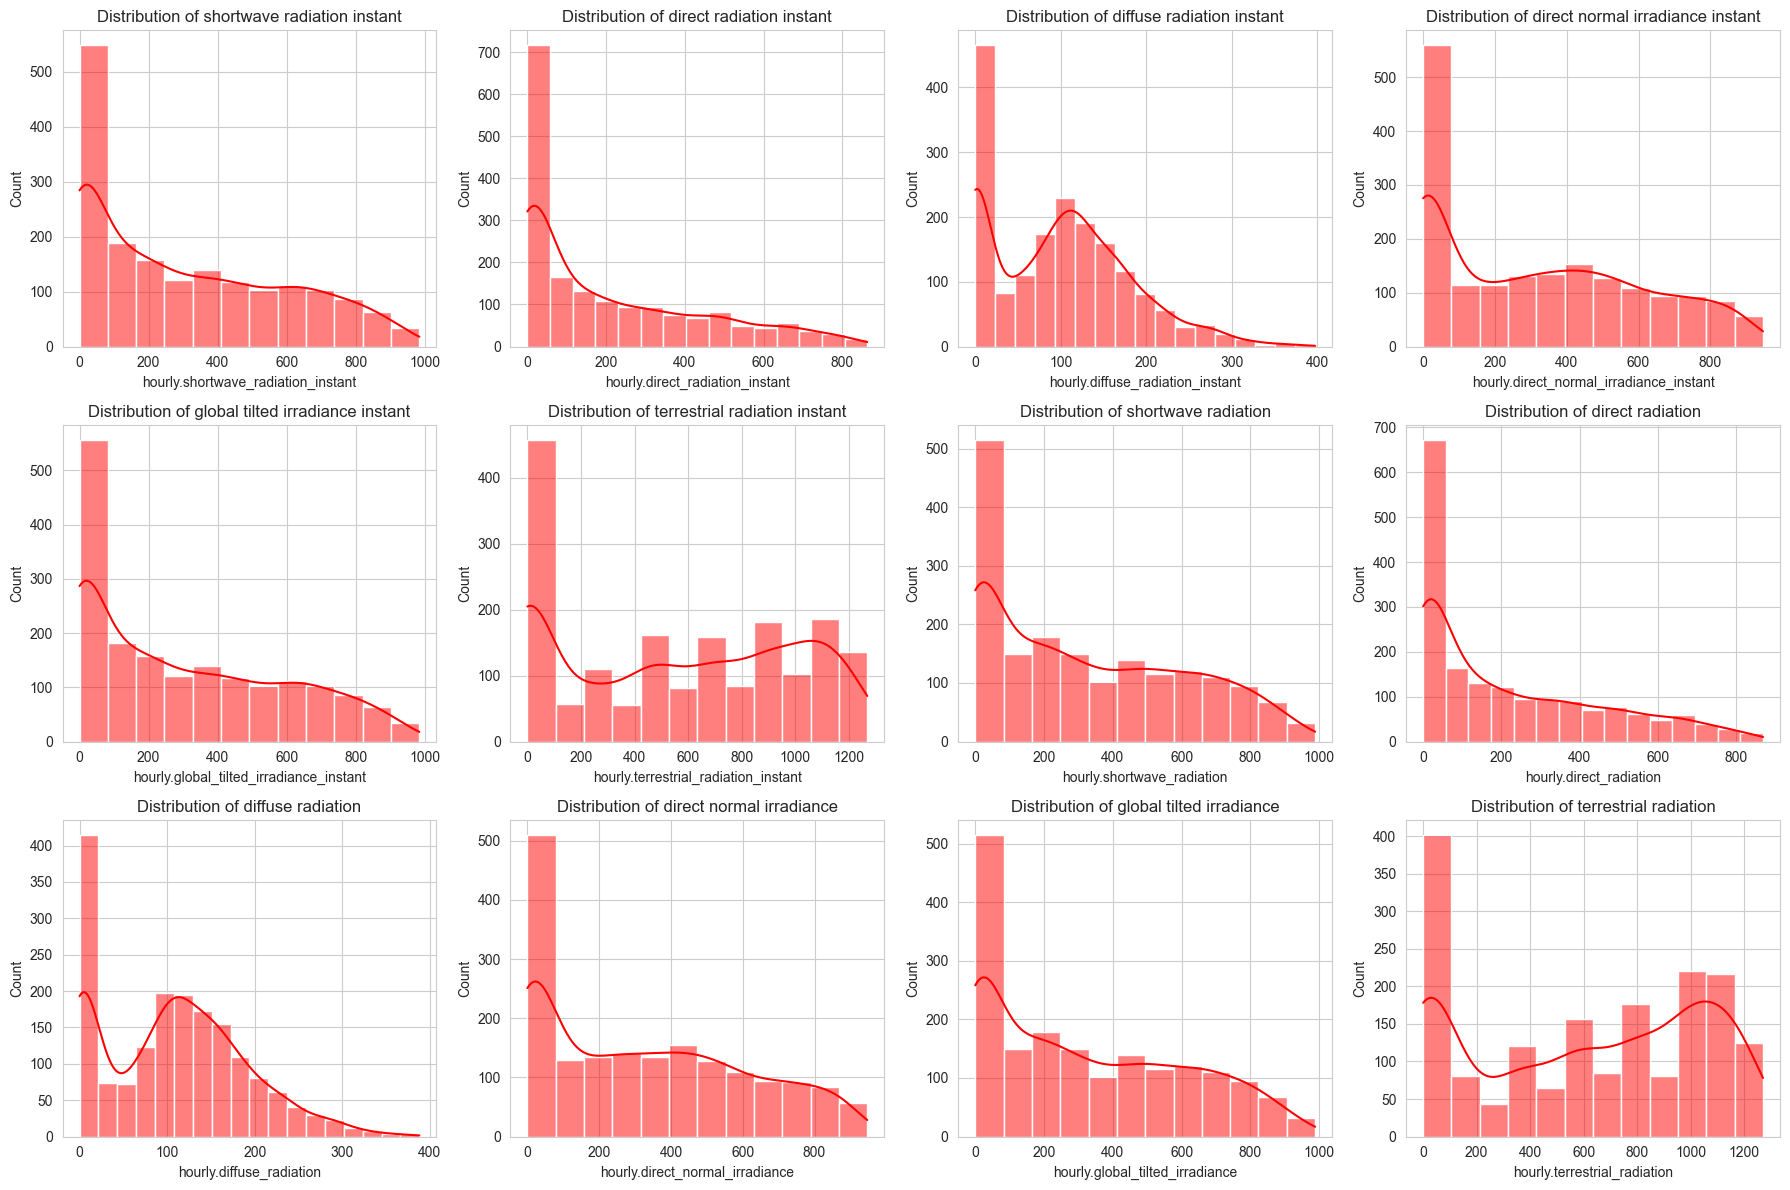

In [31]:
import math

# List of variables
variables = [
    'hourly.shortwave_radiation_instant',
       'hourly.direct_radiation_instant', 'hourly.diffuse_radiation_instant',
       'hourly.direct_normal_irradiance_instant',
       'hourly.global_tilted_irradiance_instant',
       'hourly.terrestrial_radiation_instant', 'hourly.shortwave_radiation',
       'hourly.direct_radiation', 'hourly.diffuse_radiation',
       'hourly.direct_normal_irradiance', 'hourly.global_tilted_irradiance',
       'hourly.terrestrial_radiation'
   ]


'''

 


       'hourly.temperature_2m', 'hourly.relative_humidity_2m',
       'hourly.dew_point_2m', 'hourly.apparent_temperature',
       'hourly.precipitation', 'hourly.rain', 'hourly.pressure_msl',
       'hourly.surface_pressure', 'hourly.cloud_cover',
       'hourly.cloud_cover_low', 'hourly.cloud_cover_mid',
       'hourly.cloud_cover_high', 'hourly.et0_fao_evapotranspiration',
       'hourly.vapour_pressure_deficit', 'hourly.wind_speed_10m',
       'hourly.wind_speed_100m', 'hourly.wind_direction_10m',
       'hourly.wind_direction_100m', 'hourly.wind_gusts_10m',
       'hourly.soil_temperature_0_to_7cm', 'hourly.soil_temperature_7_to_28cm',
       'hourly.soil_temperature_28_to_100cm',
       'hourly.soil_temperature_100_to_255cm', 'hourly.soil_moisture_0_to_7cm',
       'hourly.soil_moisture_7_to_28cm', 'hourly.soil_moisture_28_to_100cm',
       'hourly.soil_moisture_100_to_255cm',

'''

num_vars = len(variables)
num_cols = 4
num_rows = math.ceil(num_vars / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows*4))

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(df[var], ax=axes[i], kde=True, color='red')
    axes[i].set_title(f'Distribution of {var.replace("_", " ").replace("hourly.", "")}')

if num_vars % num_cols != 0:
    for j in range(i+1, num_rows*num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('simpleStatistics/distribution_weather_variables2FT.png')
plt.show()

/tmp/ipykernel_11702/3216631060.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='count', data=month_counts, palette='viridis')


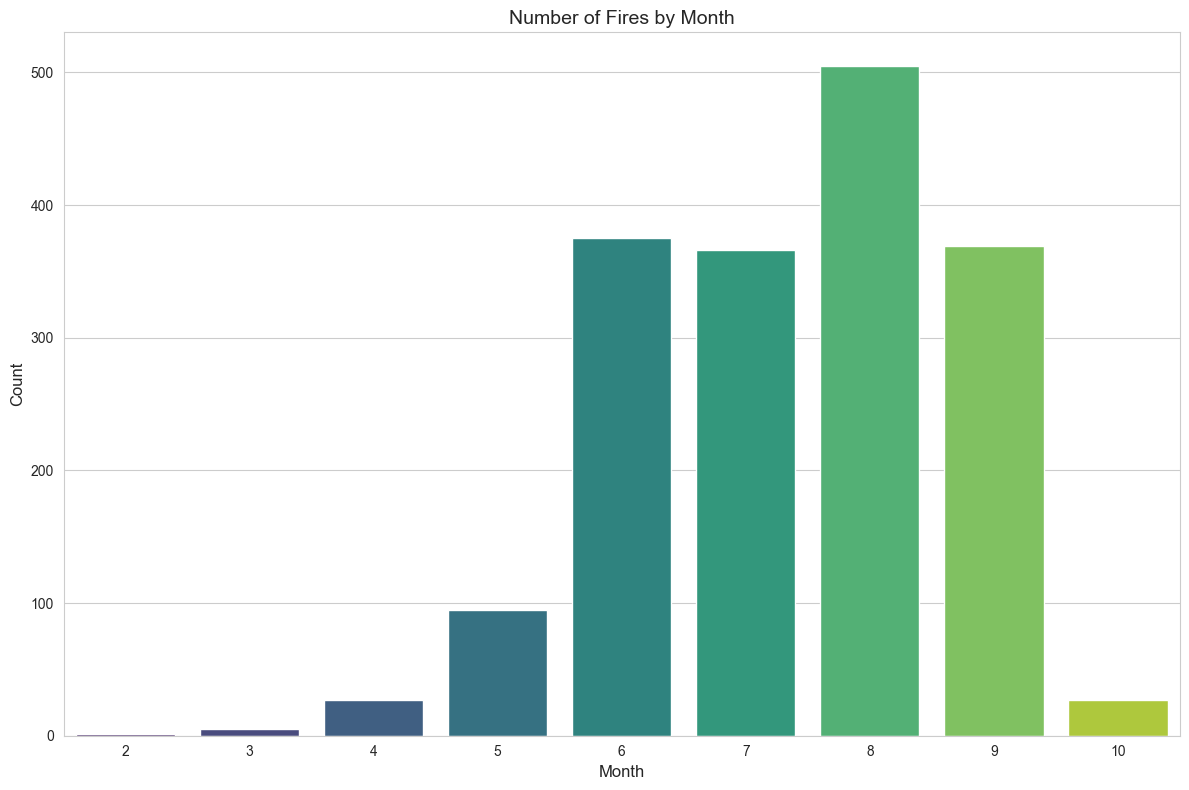

In [35]:
df['hourly.time'] = pd.to_datetime(df['hourly.time'])

df['month'] = df['hourly.time'].dt.month

month_counts = df['month'].value_counts().reset_index()

month_counts.columns = ['month', 'count']

month_counts = month_counts.sort_values('month')

plt.figure(figsize=(12, 8))
sns.barplot(x='month', y='count', data=month_counts, palette='viridis')

plt.title('Number of Fires by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

plt.savefig('simpleStatistics/monthly_fire_count.png')

plt.show()

/tmp/ipykernel_11702/2250402977.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='district', data=district_counts, palette='coolwarm')


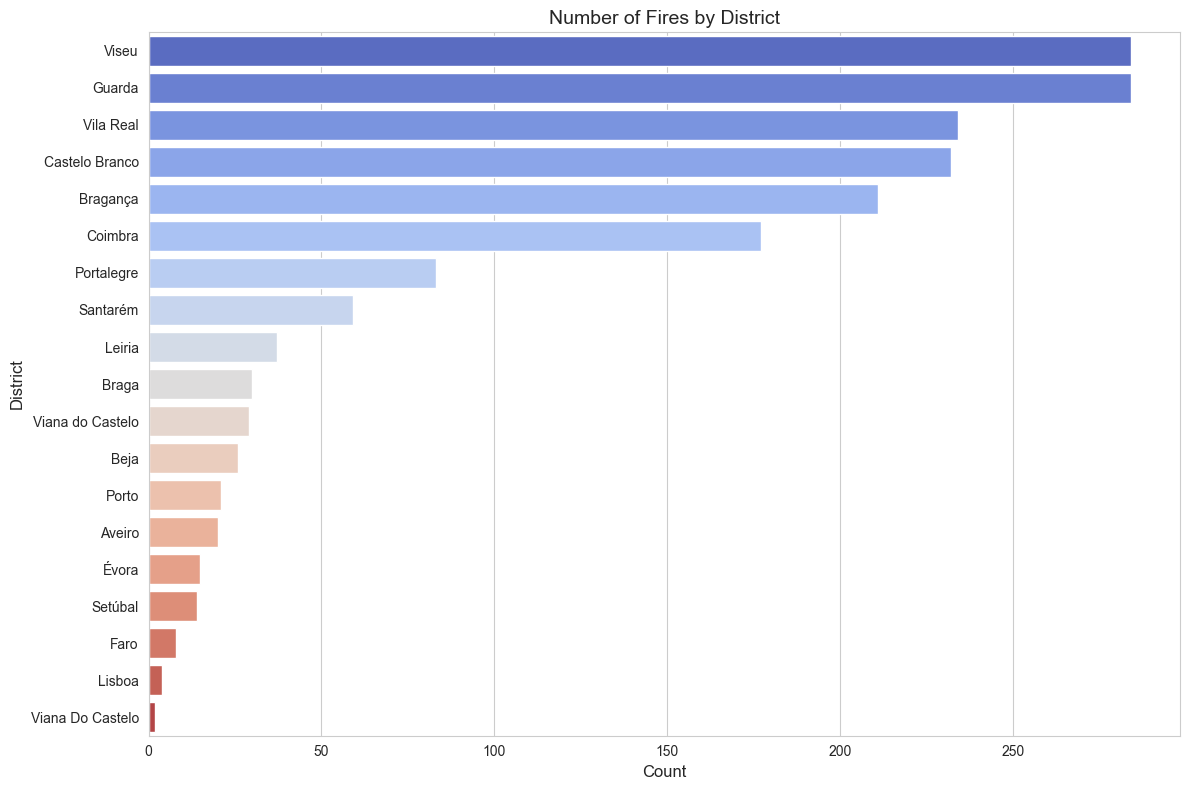

In [37]:
district_counts = df['district'].value_counts().reset_index()

district_counts.columns = ['district', 'count']

district_counts = district_counts.sort_values('count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='district', data=district_counts, palette='coolwarm')

plt.title('Number of Fires by District', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('District', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

plt.savefig('simpleStatistics/district_fire_count.png')

plt.show()

/tmp/ipykernel_9561/493672218.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CLC_CODE', y='count', data=district_counts, palette='Greens')


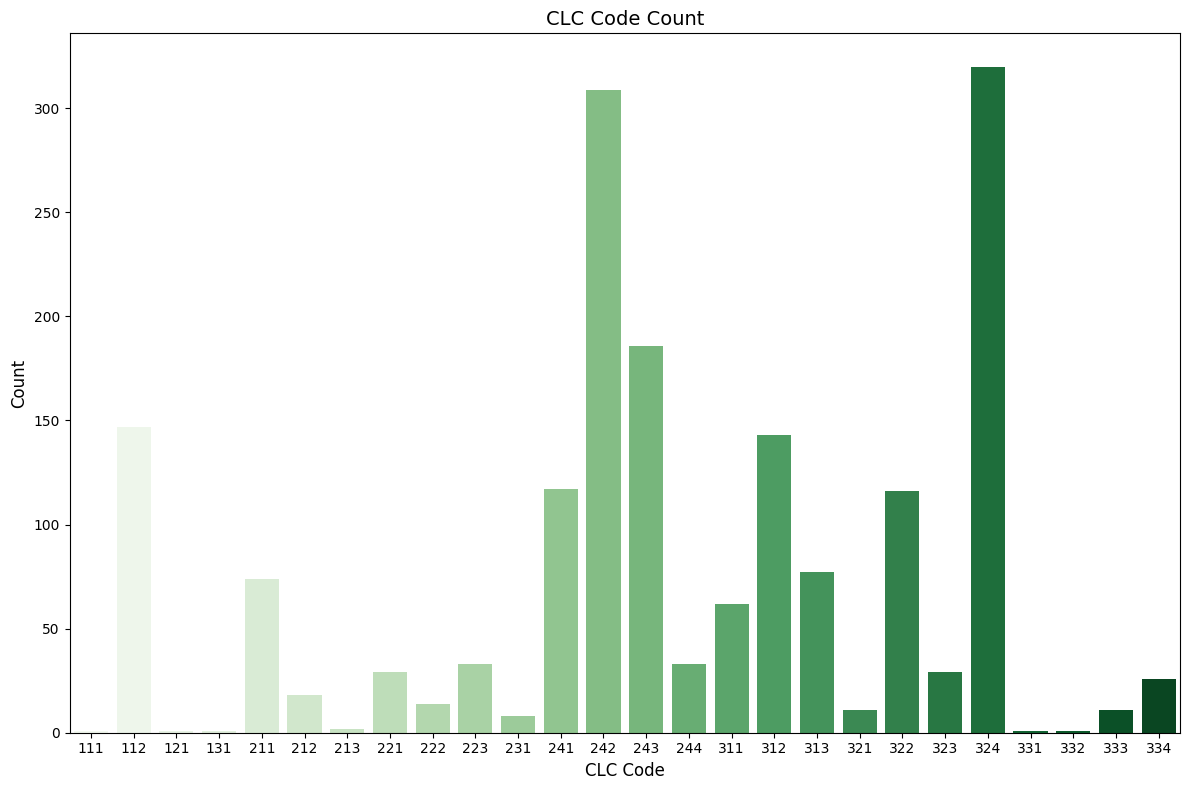

In [4]:
district_counts = df['CLC_CODE'].value_counts().reset_index()

# Convert 'CLC_CODE' to integer
district_counts['CLC_CODE'] = district_counts['CLC_CODE'].astype(int)

district_counts.columns = ['CLC_CODE', 'count']

district_counts = district_counts.sort_values('count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='CLC_CODE', y='count', data=district_counts, palette='Greens')

plt.title('CLC Code Count', fontsize=14)
plt.xlabel('CLC Code', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

plt.savefig('simpleStatistics/clc_code_count.png')

plt.show()